In [1]:
import os
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\interacting_galaxies'

In [16]:
import matplotlib.pyplot as plt

# this is not a real package just a collection of functions i made in a .py file 
# this also includes the convenience_functions.py file that was given by Tuttle
from funcrefs import fnrefs as rfs
from funcrefs import convenience_functions as cf

### viewing raw files (will fix aesthetics later)

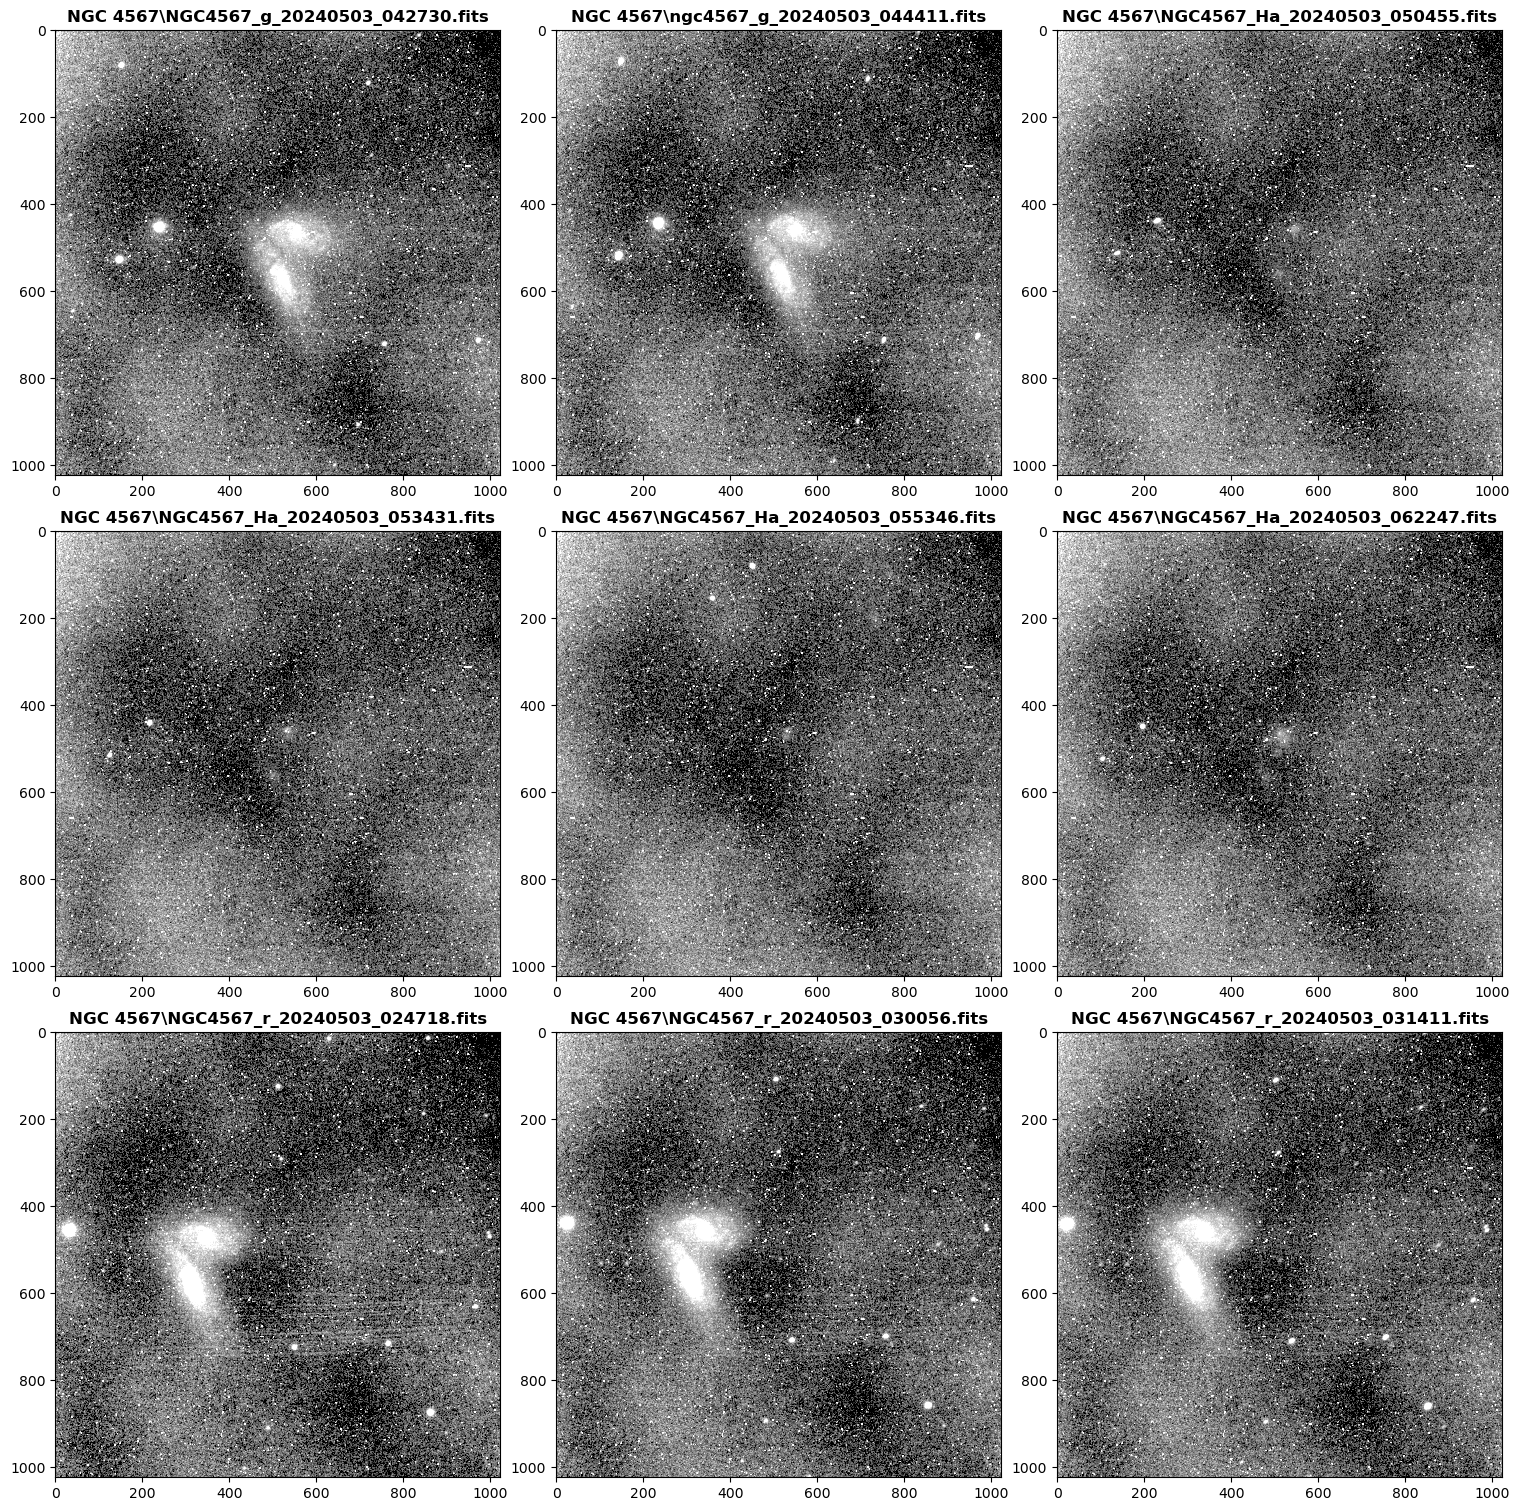

In [3]:
obs1_path = os.path.relpath("NGC 4567")
obs1_files = [os.path.join(obs1_path, f) for f in os.listdir(obs1_path) if f.endswith('.fits')]

rfs.map_fits(
    files = obs1_files,
    hdul_index = 0,
    nrows = 3,
    ncols = 3,
    figsize = (15, 15),
    cmap = 'grey',
    interpolation = 'hermite',
    interval = 'ZScale',
    stretch = 'Sqrt',
    vmin = 40,
    vmax = 96,
)

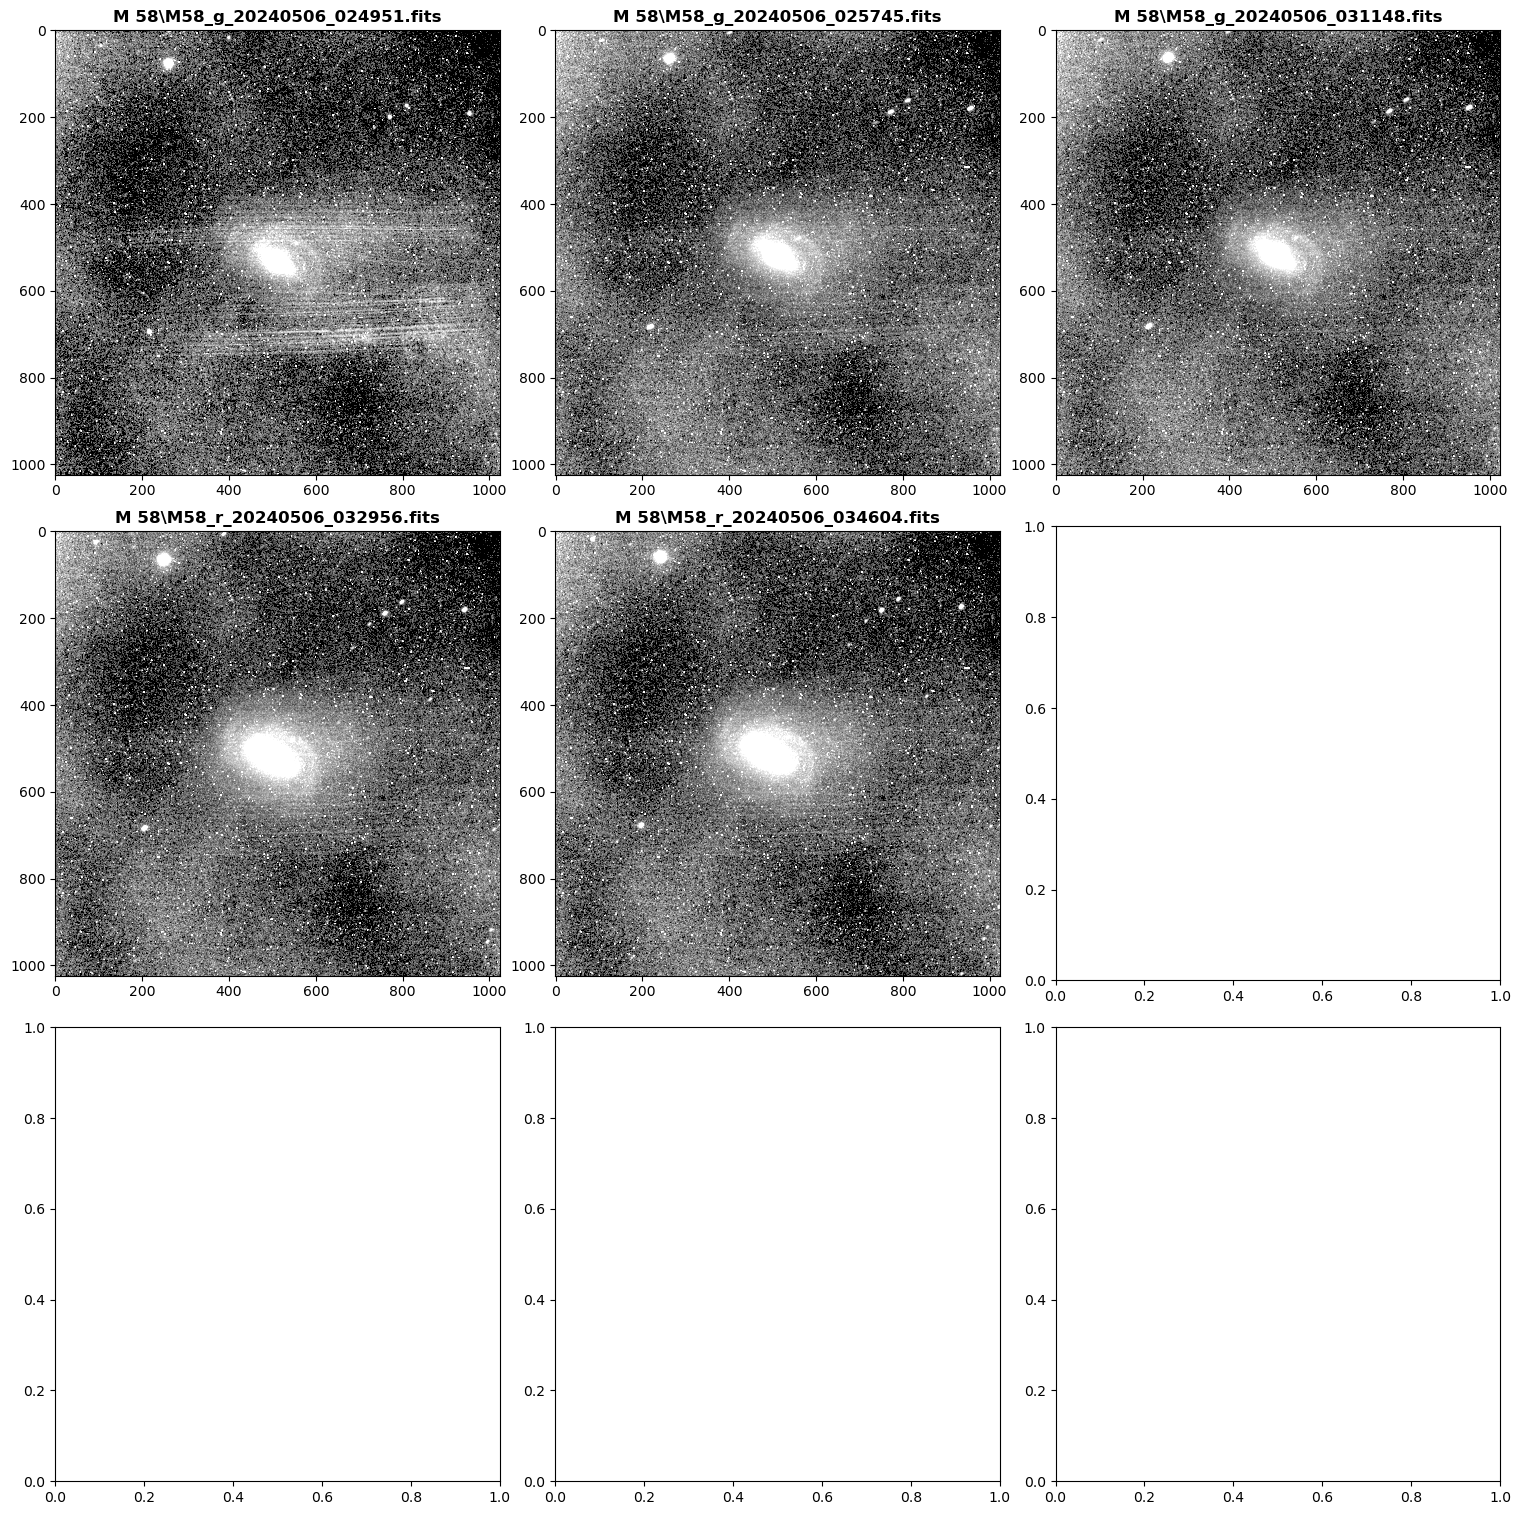

In [4]:
obs2_path = os.path.relpath("M 58")
obs2_files = [os.path.join(obs2_path, f) for f in os.listdir(obs2_path) if f.endswith('.fits')]

rfs.map_fits(
    files = obs2_files,
    hdul_index = 0,
    nrows = 3,
    ncols = 3,
    figsize = (15, 15),
    cmap = 'grey',
    interpolation = 'hermite',
    interval = 'ZScale',
    stretch = 'Sqrt',
    vmin = 40,
    vmax = 96,
)

### starting image processing

creating master files for biases, darks, and flats to use in data reduction

In [6]:
# BIASES
bias_path = os.path.relpath("biases")
bias_files = [os.path.join(bias_path, f) for f in os.listdir(bias_path) if f.endswith('.fits')]
rfs.create_master(bias_files, 'biases/master_bias.fits') # overwrites if file already exists and cell is run again


# DARKS
dark_path = os.path.relpath("darks")
dark_files = [os.path.join(dark_path, f) for f in os.listdir(dark_path) if f.endswith('.fits')]
rfs.create_master(dark_files, 'darks/master_dark.fits') # overwrites if file already exists and cell is run again


# G FILTER FLATS
gfilter_path = os.path.relpath("flats/g flats")
gfilter_files = [os.path.join(gfilter_path, f) for f in os.listdir(gfilter_path) if f.endswith('.fits')]
rfs.create_master(gfilter_files, 'flats/g flats/master_gfilter.fits') # overwrites if file already exists and cell is run again

# Ha FILTER FLATS
hafilter_path = os.path.relpath("flats/ha flats")
hafilter_files = [os.path.join(hafilter_path, f) for f in os.listdir(hafilter_path) if f.endswith('.fits')]
rfs.create_master(hafilter_files, 'flats/ha flats/master_hafilter.fits') # overwrites if file already exists and cell is run again

# I FILTER FLATS
ifilter_path = os.path.relpath("flats/i flats")
ifilter_files = [os.path.join(ifilter_path, f) for f in os.listdir(ifilter_path) if f.endswith('.fits')]
rfs.create_master(ifilter_files, 'flats/i flats/master_ifilter.fits') # overwrites if file already exists and cell is run again

# R FILTER FLATS
rfilter_path = os.path.relpath("flats/r flats")
rfilter_files = [os.path.join(rfilter_path, f) for f in os.listdir(rfilter_path) if f.endswith('.fits')]
rfs.create_master(rfilter_files, 'flats/r flats/master_rfilter.fits') # overwrites if file already exists and cell is run again

stack with wcs position to crop images, not x/y position

i.e. stack as a function of position, not CCD position, so it's okay if they aren't lined up

use wcs to translate pixel to coordinate system then combiner to combine the images

In [28]:
from astropy.io import fits
from astropy.wcs import WCS
from ccdproc import Combiner
from astropy.nddata import CCDData
import re
import astropy.units as u
import numpy as np

In [35]:
# from WCS documentation: https://docs.astropy.org/en/stable/wcs/#a-simple-example
    # fn = get_pkg_data_filename('data/j94f05bgq_flt.fits', package='astropy.wcs.tests')
    # f = fits.open(fn)
    # w = WCS(f[1].header)
    # sky = w.pixel_to_world(30, 40)
    # x, y = w.world_to_pixel(sky)
# LOL idk what i'm doing, will need to figure this out


for file in os.listdir('NGC 4567/'):
    
    # Combining G Filter images
    if re.search('_g_', file):
        image_data = []
        
        with fits.open('NGC 4567/' + file) as hdul:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
            
            world_coords = wcs.pixel_to_world((data.shape[0], data.shape[1]), 0)
            ccd = CCDData(data, unit=u.adu)
            
            image_data.append(ccd)

        combined_data = np.asarray( Combiner(image_data).median_combine() )
        # print('Original data shape: {}'.format(data.shape))
        # print('Combined data shape: {}'.format(combined_data.shape))
        fits.writeto('NGC 4567/combo_g.fits', combined_data, overwrite=True)
    
    # Combining Ha Filter images
    if re.search('_Ha_', file):
        image_data = []
        
        with fits.open('NGC 4567/' + file) as hdul:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
            
            world_coords = wcs.pixel_to_world((data.shape[0], data.shape[1]), 0)
            ccd = CCDData(data, unit=u.adu)
            
            image_data.append(ccd)

        combined_data = np.asarray( Combiner(image_data).median_combine() )
        fits.writeto('NGC 4567/combo_Ha.fits', combined_data, overwrite=True)
    
    # Combining R Filter images
    if re.search('_r_', file):
        image_data = []
        
        with fits.open('NGC 4567/' + file) as hdul:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
            
            world_coords = wcs.pixel_to_world((data.shape[0], data.shape[1]), 0)
            ccd = CCDData(data, unit=u.adu)
            
            image_data.append(ccd)

        combined_data = np.asarray( Combiner(image_data).median_combine() )
        fits.writeto('NGC 4567/combo_r.fits', combined_data, overwrite=True)
    
    # Combining I Filter images
    if re.search('_i_', file):
        image_data = []
        
        with fits.open('NGC 4567/' + file) as hdul:
            data = hdul[0].data
            wcs = WCS(hdul[0].header)
            
            world_coords = wcs.pixel_to_world((data.shape[0], data.shape[1]), 0)
            ccd = CCDData(data, unit=u.adu)
            
            image_data.append(ccd)

        combined_data = np.asarray( Combiner(image_data).median_combine() )
        fits.writeto('NGC 4567/combo_i.fits', combined_data, overwrite=True)